#**Ajuste lineal utilizando el metodo de minimos cuadrados**
El código que se muestra a continuacíon permite realizar ajustes por medio del
método de los mínimos cuadrados

In [ ]:
#Esto pemite montar la carpeta de drive en el espacio de google colab
#Se debe dar permisos para poder montar los archivos del drive
from google.colab import drive
import sys
drive.mount('/content/gdrive')
#cd path/to/your/folder
#!cd /content/gdrive/MyDrive/"Colab Notebooks"
#sys.path.append('/content/gdrive/My Drive/Colab Notebooks/')

!ls  #listamos el directorio en el que estamos ubicados


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
gdrive	sample_data


In [ ]:
#Especificamos la ruta de la carpeta en la cual estaran los datos
from pathlib import Path
# the path of the directory which saves your .py file
src_dir1 = Path('/content/gdrive/MyDrive/Colab Notebooks/')

# add the path to system path
import sys
try:
  sys.path.index(str(src_dir1))
except ValueError:
  sys.path.insert(0,str(src_dir1))

# print system path
sys.path

['/content/gdrive/MyDrive/Colab Notebooks',
 '/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor',
 '/root/.ipython']

In [ ]:
#Programa para realizar un ajsute lineal en python
#Se importan todas las librerias necesarias para realizar los ajustes
import numpy as np
import matplotlib.pyplot as plt
import linearAdjust as la #Este modulo debe estar el la carpeta donde se ejecuta el codigo
import random as rand
import time as tm

In [ ]:
#Funcion para convertir los datos tipo str a float
def str2float(lst):
	return np.array([float(i) for i in lst])

In [ ]:
#Se pide el nombre de archivo y se carga el mismo
print("Nombre de archivo de los datos con extension: ", end="")
name = str(input())
#name = ""
print("Delimitador de campo: ", end="")
delimiter = str(input())
#delimiter = ""
print("# de linea de inicio de datos: ", end="")
sLine = int(input())
#sLine = ""
print("# de ajustes lineales a realizar: ", end="")
numAjus = int(input())
#numAjus = ""
fileData = np.loadtxt(sys.path[0]+'/'+name,dtype=str, delimiter=delimiter, skiprows = sLine)

Nombre de archivo de los datos con extension: dataLineal.csv
Delimitador de campo: ;
# de linea de inicio de datos: 1
# de ajustes lineales a realizar: 2


##########Ajuste Lineal de los datos##########
Asjute lineal #:  0
pendiente:  0.515104603634106
intercepto:  0.5282404393698164
maximo error en Dy:  0.28813267291939926
error en Pendiente:  0.05785843304430078
error en intercepto:  0.05175015574347065
Coeficiente de Correlacion Lineal (R^2):  0.8556447420523671
##############################################
##########Ajuste Lineal de los datos##########
Asjute lineal #:  2
pendiente:  1.4901642838916653
intercepto:  0.5290105319788478
maximo error en Dy:  0.297207048629884
error en Pendiente:  0.059680611536396956
error en intercepto:  0.053379961733656695
Coeficiente de Correlacion Lineal (R^2):  0.9775234848521954
##############################################


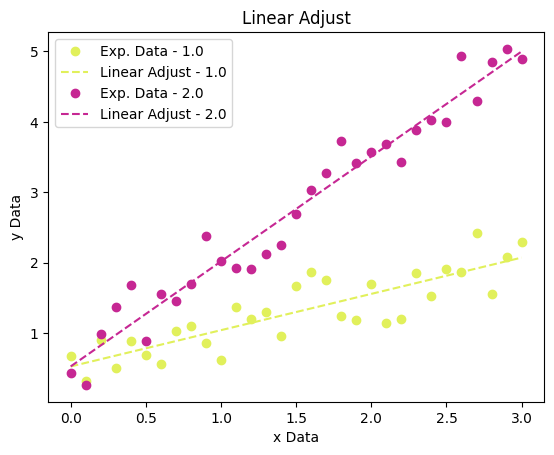

In [ ]:
#Realizamos los ajustes y hacemos las graficas al mismo tiempo
plt.figure()
rand.seed(tm.time())

#Se realiza un ciclo por cada conjunto de datos
for i in range(0,2*numAjus-1,2):
	#Se extraen los datos
	x_exp = str2float(fileData[:,i])
	y_exp = str2float(fileData[:,i+1])
	n = x_exp.size

	##########Ajuste Lineal de los datos##########
	(pend, inter, Dm, Db, r, Dy) = la.linAdj(x_exp,y_exp,n)
	##########Ajuste Lineal de los datos##########

	print("##########Ajuste Lineal de los datos##########")
	print("Asjute lineal #: ", i)
	print("pendiente: ", pend)
	print("intercepto: ", inter)
	print("maximo error en Dy: ", Dy)
	print("error en Pendiente: ",Dm)
	print("error en intercepto: ",Db)
	print("Coeficiente de Correlacion Lineal (R^2): ",r)
	print("##############################################")

	x_teo = np.linspace(x_exp[0], x_exp[n-1], n*100)
	y_teo = pend*x_teo + inter

	#print("Datos en x: %f", x_exp)
	#print("Datos en y: %f", y_exp)
	r = rand.random()
	b = rand.random()
	g = rand.random()
	color = (r, g, b)

	label1 = "Exp. Data - " #Modificar esta linea si se desea cambiar la desc. legenda
	label2 = "Linear Adjust - " #Modificar esta linea si se desea cambiar la desc. legenda

	plt.plot(x_exp,y_exp,"o", label=label1 + str(i/2+1),color = color)
	plt.plot(x_teo,y_teo,"--", label=label2+str(i/2 + 1), color = color)

plt.xlabel("x Data") #Modificar esta linea para cambiar el label del eje x
plt.ylabel("y Data") #Modificar esta linea para cambiar el label del eje y
plt.title("Linear Adjust") #Modificar esta linea para cambiar el titulo de la grafica
plt.legend()
plt.savefig(sys.path[0]+'/'+"linearAdjust.png")
plt.show()